<h2 align='center'> Used Car Price Prediction</h2>

### Task: 
You have been hired by a new car trader company to help sell its used cars. You will be analyzing used cars from multiple manufacturers and of different models.

### Objective: 
Your job is to help the car trader company determine the price of its used cars.

### About the dataset

#### Description 
- manufacturer_name: the name of the car manufacturer
- model_name: the name of the car model
- transmission: the type of transmission the car has
- color: the body color of the car
- odometer_value: odometer state in kilometers
- year_produced: the year the car was produced
- engine_fuel: the fuel type of the engine of the car
- engine_has_gas: whether or not the car has a propane tank with tubing
- engine_type: the engine type of the car
- engine_capacity: capacity of the engine in liters
- body_type: the of body the car has
- has_warranty: whether the car has warranty
- state: the state of the car (new, owned, etc.)
- drivetrain: type of drivetrain (front, rear, all)
- feature_1 – feature_9: these features are boolean values about properties of the car
- duration_listed: the number of days the car is listed in the catalog
- price_usd: price of the car in USD

### Evaluation Critera:

$$\begin{equation*}
MSE = {\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}}
\end{equation*}$$


### Importing essentials modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

### Loading Training Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/edis/sds_challenges/master/challenge_2/data/public_cars.csv")
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


### Inspecting Data

In [3]:
df.shape

(30824, 26)

- Training Dataset comprises 30,824 observations(rows) and 26 features(columns).
- Out of the 26, one is the target variable and rest 25 are input variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30824 entries, 0 to 30823
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  30824 non-null  object 
 1   model_name         30824 non-null  object 
 2   transmission       30824 non-null  object 
 3   color              30824 non-null  object 
 4   odometer_value     30824 non-null  int64  
 5   year_produced      30824 non-null  int64  
 6   engine_fuel        30824 non-null  object 
 7   engine_has_gas     30824 non-null  bool   
 8   engine_type        30824 non-null  object 
 9   engine_capacity    30816 non-null  float64
 10  body_type          30824 non-null  object 
 11  has_warranty       30824 non-null  bool   
 12  state              30824 non-null  object 
 13  drivetrain         30824 non-null  object 
 14  feature_0          30824 non-null  bool   
 15  feature_1          30824 non-null  bool   
 16  feature_2          308

- The data has 2 float, 3 integer and 9 object attributes and 12 bool columns(True/False) .
- There are some missing values in engine_capacity

### Statistical Summary
- Get a Statistical Overview using describe() function

In [5]:
df.describe()

,odometer_value,year_produced,engine_capacity,duration_listed,price_usd
count,30824.000000,30824.000000,30816.000000,30824.000000,30824.000000
mean,248803.130515,2002.939690,2.054232,80.344407,6630.598604
std,135760.720763,8.048786,0.667535,112.656926,6412.213626
min,0.000000,1950.000000,0.200000,0.000000,1.000000
25%,158146.500000,1998.000000,1.600000,23.000000,2145.857500
50%,250000.000000,2003.000000,2.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,91.000000,8950.000000
max,1000000.000000,2019.000000,7.500000,2232.000000,50000.000000


- The attributes odometer_value, duration_listed, price_usd has huge difference in their 75% and maximum values, ie seems to have some outliers
- duration_listed and price_usd seems to have large difference in mean and median vlues, ie there is outliers in these attributes
- engine_capacity seems to be normally distributed

### Exploratory Data Analysis

C:\Users\RAJEEV\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\RAJEEV\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


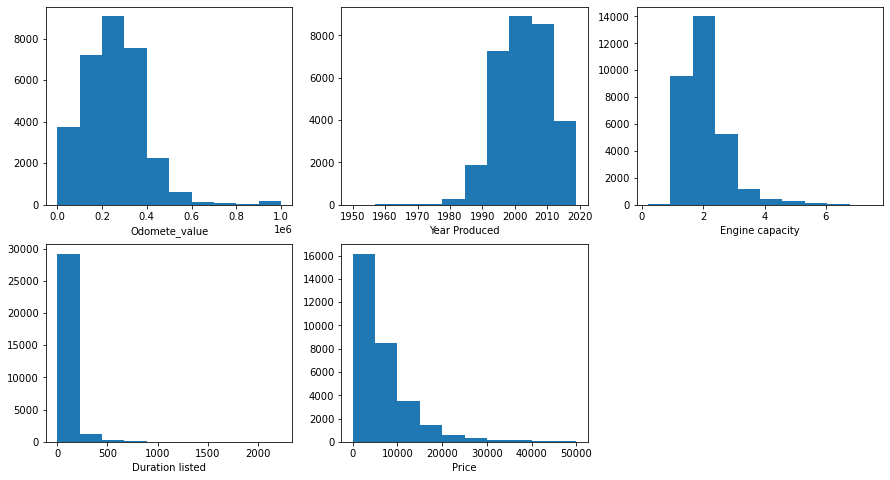

In [6]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.hist(df.odometer_value)
plt.xlabel("Odomete_value");

plt.subplot(2,3,2)
plt.hist(df.year_produced)
plt.xlabel("Year Produced");

plt.subplot(2,3,3)
plt.hist(df.engine_capacity)
plt.xlabel("Engine capacity");

plt.subplot(2,3,4)
plt.hist(df.duration_listed)
plt.xlabel("Duration listed");

plt.subplot(2,3,5)
plt.hist(df.price_usd)
plt.xlabel("Price");

- odometer_value, price, engine_capacity, duration_listed seems to be positively skewed as data is shifted towards left
- year produced is negatively skewed ie, shifted towards right and have car production range from around 1960 till 2019.

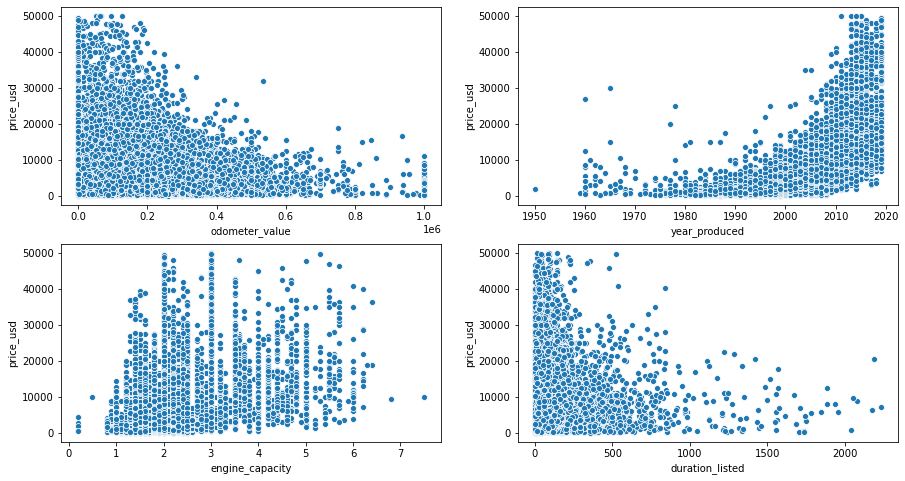

In [7]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.scatterplot(df.odometer_value, df.price_usd);

plt.subplot(2,2,2)
sns.scatterplot(df.year_produced, df.price_usd);

plt.subplot(2,2,3)
sns.scatterplot(df.engine_capacity, df.price_usd);

plt.subplot(2,2,4)
sns.scatterplot(df.duration_listed, df.price_usd);

### Analysis for categorical variables

In [8]:
df['manufacturer_name'].value_counts().head(25)

Volkswagen       3406
Opel             2193
BMW              2091
Ford             2080
Renault          1999
Audi             1972
Mercedes-Benz    1807
Peugeot          1529
Citroen          1236
Nissan           1084
Mazda            1081
Toyota            994
Hyundai           908
Skoda             906
Kia               715
Mitsubishi        711
Fiat              656
Honda             639
Volvo             573
ВАЗ               386
Chevrolet         344
Chrysler          317
Dodge             247
Subaru            238
Seat              223
Name: manufacturer_name, dtype: int64

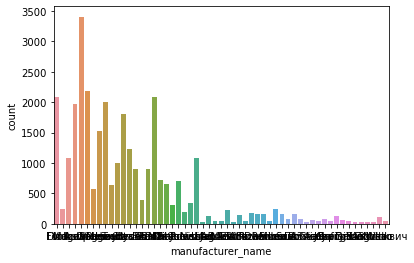

In [9]:
sns.countplot(df.manufacturer_name);

- For prediction of modeling we will take only top 11 columns rest all are considered to be noise
- It is done in Task3 : data-preprocessing

In [10]:
df['model_name'].value_counts().head(5)

Passat    1153
Astra      595
Golf       577
A6         546
Mondeo     503
Name: model_name, dtype: int64

- We will take only 5 models for consideration
- It is done in Task3 : data-preprocessing

In [11]:
df['transmission'].value_counts()

mechanical    20493
automatic     10331
Name: transmission, dtype: int64

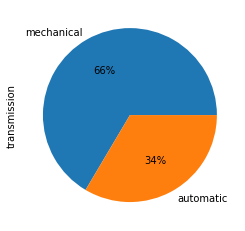

In [12]:
df['transmission'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

- There are 66% mechanical cars and 34% automatic cars

In [13]:
df['color'].value_counts()

black     6162
silver    5480
blue      4671
white     3390
grey      2962
red       2316
green     2253
other     2141
brown      697
violet     369
yellow     228
orange     155
Name: color, dtype: int64

- we will manualy give one category and put the lowest occuring colors to others category for example: yellow, orange brown to others category 
- It is done in Task3 : data-preprocessing

In [14]:
df['engine_fuel'].value_counts()

gasoline         19259
diesel           10303
gas               1070
hybrid-petrol      182
electric             8
hybrid-diesel        2
Name: engine_fuel, dtype: int64

- We will creae one category named others and put 'hybrid-petrol', 'gas', 'electric', 'hybrid-diesel' into others category
- It is done in Tsk3: Data-preprocessing

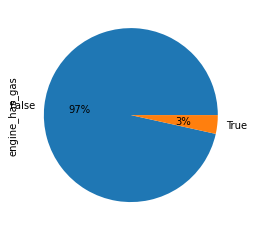

In [15]:
df['engine_has_gas'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

- 97% of the cars doesn't have gas engines
- imbalanced attribute ie, model become bias for this attribute and always predict False 
- Irrelevent column for prediction of price of car

In [16]:
df['engine_type'].value_counts()

gasoline    20511
diesel      10305
electric        8
Name: engine_type, dtype: int64

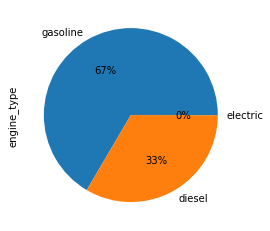

In [17]:
df['engine_type'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

-  Electric engines are so rare (only 8 engines out of 30,000+ engines)
- We have 67% gasoline engines and 33% disel engines 

In [18]:
df['body_type'].value_counts()

sedan        10433
hatchback     6095
universal     4397
suv           4123
minivan       2916
minibus       1093
van            644
coupe          504
liftback       453
pickup         105
cabriolet       50
limousine       11
Name: body_type, dtype: int64

- We will select only top 5 body type for consideration
- It is done in Task3 : data-preprocessing

In [19]:
df['has_warranty'].value_counts()

False    30457
True       367
Name: has_warranty, dtype: int64

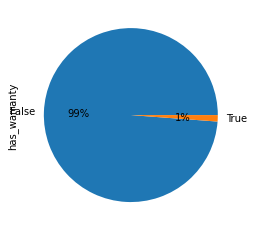

In [20]:
df['has_warranty'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

- 99% of the cars has warranty certicate 
- Highly Imbalanced attribute
- Model become bias for this attribute and always predict False 
- Irrelevent column for prediction of price of car

In [21]:
df['state'].value_counts()

owned        30154
new            368
emergency      302
Name: state, dtype: int64

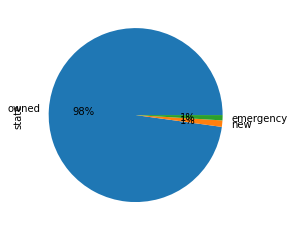

In [22]:
df['state'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

- 98% of the cars has stae = owned . 
- Model becomes biased and always predict owned 
- so, this attribute becomes irrelevent for consideration

In [23]:
df['drivetrain'].value_counts()

front    22193
rear      4350
all       4281
Name: drivetrain, dtype: int64

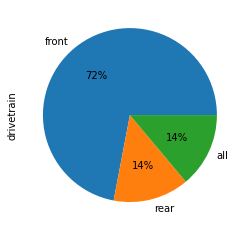

In [24]:
df['drivetrain'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

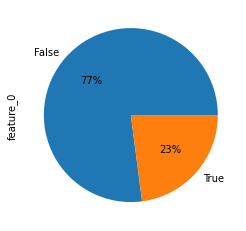

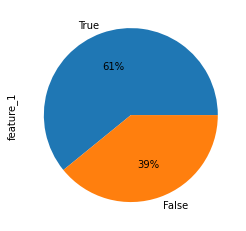

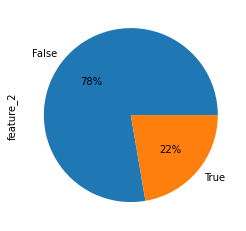

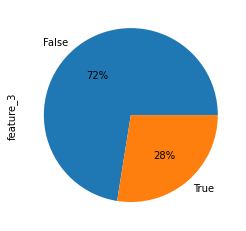

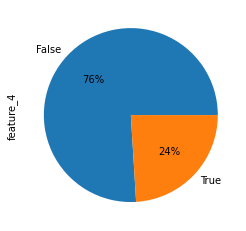

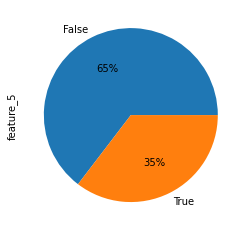

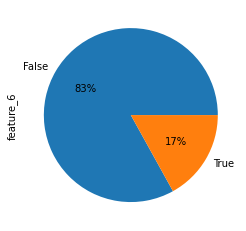

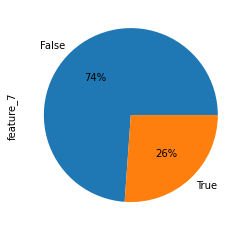

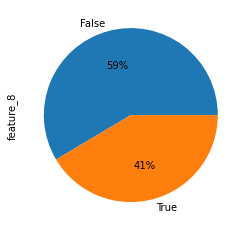

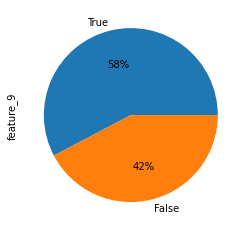

In [25]:
list_features = ['feature_0', 'feature_1','feature_2', 'feature_3', 'feature_4', 
                 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']

for i in list_features: 
    df[i].value_counts().plot(kind='pie', autopct = "%1.0f%%")
    plt.show()

- All the features from 0 to 9 seems to be important 

### Correlation Matrix

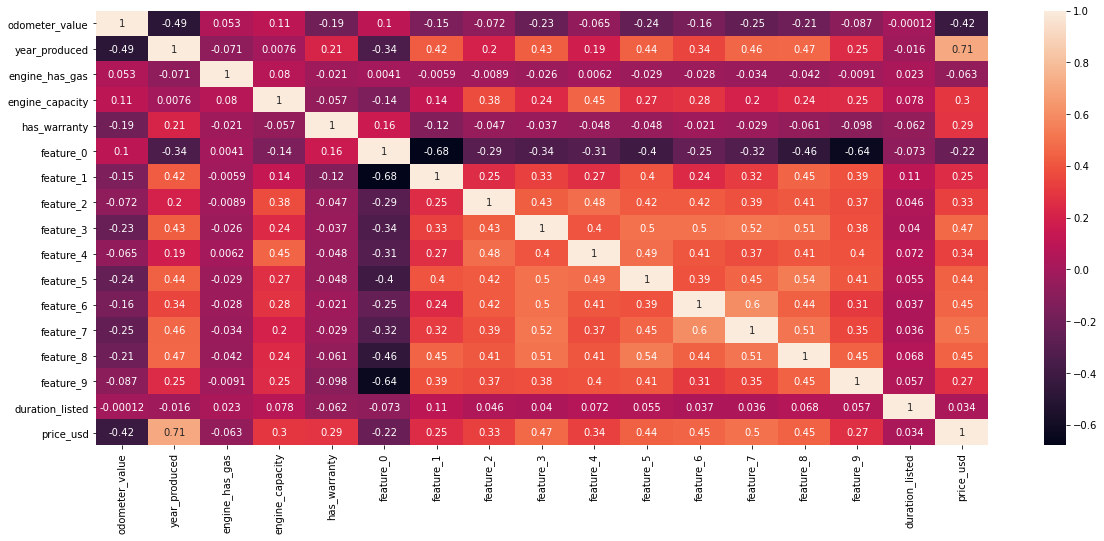

In [26]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)

- The attribute 'year_produced' have moderate negative correlation with odometer value
- The target variable has High positive correlation with year produced
- feature_0 has high negative correlation with feature_1
- All the other features from 1 to 9 has moderate positive corelation with each other
- duration listed, engine_has_gas, has_warranty seems to have very low correlation with each feature.
- The target variable has moderate negative correlation with odometer value

### Year-wise price analysis

In [27]:
df['year_produced'].value_counts()

1998    1771
2008    1716
1997    1500
1999    1495
2001    1480
        ... 
1961       2
1973       2
1971       1
1959       1
1950       1
Name: year_produced, Length: 62, dtype: int64

In [28]:
df_year = df.groupby(['year_produced']).sum()
df_year['year_produced'] = df_year.index
df_year.head()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd,year_produced
year_produced,,,,,,,,,,,,,,,,,
1950,100000,0.0,2.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2000.00,1950
1959,1,0.0,1.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,800.00,1959
1960,287288,0.0,28.9,0.0,13.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,3011,79625.32,1960
1961,54000,0.0,4.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,963,13000.00,1961
1962,387303,0.0,12.3,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,980,25553.84,1962


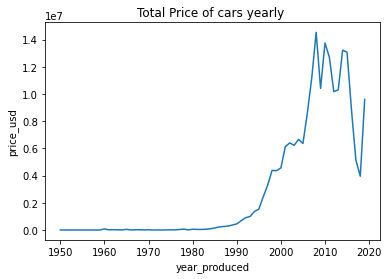

In [29]:
sns.lineplot(x=df_year.year_produced, y=df_year.price_usd)
plt.title("Total Price of cars yearly ");

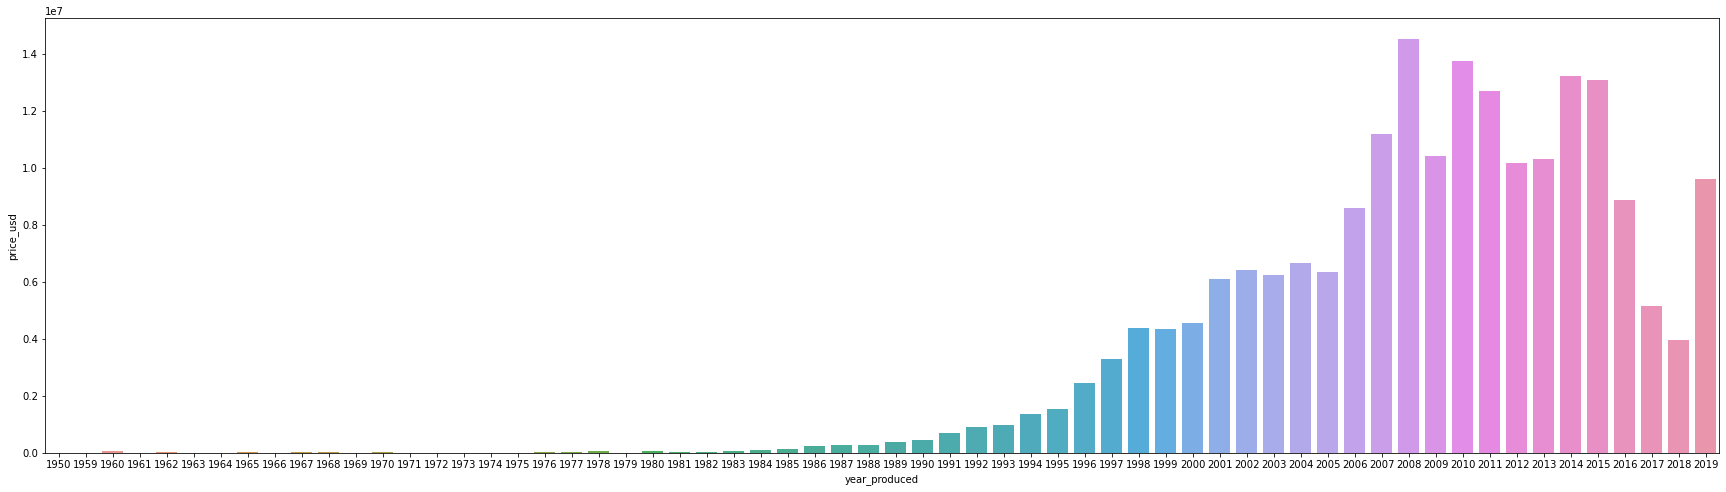

In [30]:
plt.figure(figsize=(30,8))
sns.barplot(x=df_year.year_produced, y=df_year.price_usd)

- From 1950 there is gradual increase in sales price of cars. 
- In 2008, there is maximum price_usd
- After 2008, there is sudden decrease in price in 2017 -2018. 

### Outlier Detection   

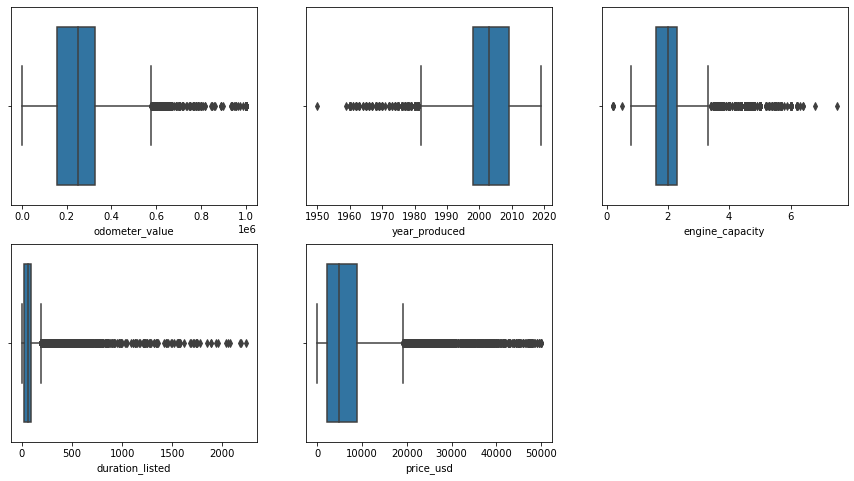

In [31]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.boxplot(df.odometer_value);

plt.subplot(2,3,2)
sns.boxplot(df.year_produced);

plt.subplot(2,3,3)
sns.boxplot(df.engine_capacity);

plt.subplot(2,3,4)
sns.boxplot(df.duration_listed);

plt.subplot(2,3,5)
sns.boxplot(df.price_usd);

- As detected by statistical observation, we have huge amount of outliers

### Data-preprocessing

In [32]:
# creating copy of data 
data = df.copy()
data.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0


### Handling Missing values

In [33]:
data.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      8
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
price_usd            0
dtype: int64

- Only one attribute "engine_capacity" has 8 missing values 

In [34]:
# Filling missing values by median: 
data['engine_capacity'].fillna(data['engine_capacity'].median(), inplace=True)

# Check if the values are filled or not ?
data['engine_capacity'].isna().sum()

0

- Now, missing values are handled. 

### Handling multi-categorical features

- considering only top 5 or top 10 categories as per the analysis in EDA

####  consdering top 11 features from manufacturer names 

In [35]:
top_11 = [x for x in data.manufacturer_name.value_counts().sort_values(ascending=False).head(11).index ]
top_11

['Volkswagen',
 'Opel',
 'BMW',
 'Ford',
 'Renault',
 'Audi',
 'Mercedes-Benz',
 'Peugeot',
 'Citroen',
 'Nissan',
 'Mazda']

####  consdering top 5 features from model names

In [36]:
top_5 = [x for x in data.model_name.value_counts().sort_values(ascending=False).head(5).index ]
top_5

['Passat', 'Astra', 'Golf', 'A6', 'Mondeo']

####  consdering top 5 features from body type

In [37]:
top_5_body_type = [x for x in data.body_type.value_counts().sort_values(ascending=False).head(5).index ]
top_5_body_type

['sedan', 'hatchback', 'universal', 'suv', 'minivan']

In [38]:
# Create function for one hot encoding of selected features: 
def one_hot_label(data, var, top_x_label):
    for label in top_x_label:
        data[var+'_'+label] = np.where(data[var]==label, 1, 0)  

In [39]:
# Calling function 
one_hot_label(data, 'manufacturer_name', top_11)
one_hot_label(data, 'model_name', top_5)
one_hot_label(data, 'body_type', top_5_body_type)

In [40]:
print("Shape of data before performing OHE on specific columns: ", df.shape) 
print("Shape of data after performing OHE on specific columns:  ", data.shape) 

Shape of data before performing OHE on specific columns:  (30824, 26)
Shape of data after performing OHE on specific columns:   (30824, 47)


#### Dropping columns whose one-hot-encoding has been performed 

In [41]:
data.drop(['manufacturer_name', 'model_name', 'body_type'], axis=1, inplace=True)
data.head()

,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,has_warranty,state,...,model_name_Passat,model_name_Astra,model_name_Golf,model_name_A6,model_name_Mondeo,body_type_sedan,body_type_hatchback,body_type_universal,body_type_suv,body_type_minivan
0,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,False,owned,...,0,0,0,0,0,0,1,0,0,0
1,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,False,owned,...,0,0,0,0,0,0,0,0,0,1
2,mechanical,blue,168000,2009,diesel,False,diesel,1.8,False,owned,...,0,0,0,0,0,0,0,0,0,1
3,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,False,owned,...,0,0,0,0,0,0,0,1,0,0
4,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,False,owned,...,0,0,0,0,0,1,0,0,0,0


#### Creating new category   

In [42]:
colors = ['brown','violet', 'yellow', 'orange']
for i in colors:
    data['color'] = np.where(data['color']==i, 'other', data['color'])

In [43]:
data['color'].value_counts() 

black     6162
silver    5480
blue      4671
other     3590
white     3390
grey      2962
red       2316
green     2253
Name: color, dtype: int64

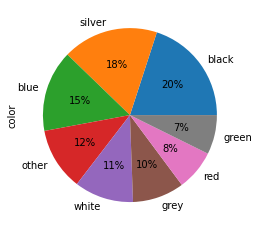

In [44]:
data.color.value_counts().plot(kind='pie', autopct = "%1.0f%%")

In [45]:
fuel = ['hybrid-petrol', 'gas', 'electric', 'hybrid-diesel']
for i in fuel:
    data['engine_fuel'] = np.where(data['engine_fuel']==i, 'others', data['engine_fuel'])

In [46]:
data['engine_fuel'].value_counts()

gasoline    19259
diesel      10303
others       1262
Name: engine_fuel, dtype: int64

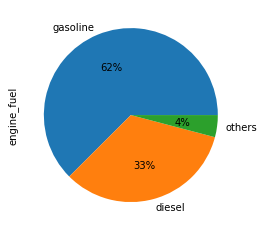

In [47]:
data.engine_fuel.value_counts().plot(kind='pie', autopct = "%1.0f%%")

### Droping Irrelevent columns  

In [48]:
data.drop(['engine_has_gas', 'has_warranty', 'state', 'duration_listed'], axis=1, inplace=True)
data.head(2)

,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,drivetrain,feature_0,feature_1,...,model_name_Passat,model_name_Astra,model_name_Golf,model_name_A6,model_name_Mondeo,body_type_sedan,body_type_hatchback,body_type_universal,body_type_suv,body_type_minivan
0,mechanical,blue,245000,2006,gasoline,gasoline,1.6,front,True,False,...,0,0,0,0,0,0,1,0,0,0
1,automatic,silver,265542,2002,gasoline,gasoline,3.3,front,False,True,...,0,0,0,0,0,0,0,0,0,1


### Converting remaining categorical variables by OHE and LabelEncoding

In [49]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head(2)

,odometer_value,year_produced,engine_capacity,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,color_other,color_red,color_silver,color_white,engine_fuel_gasoline,engine_fuel_others,engine_type_electric,engine_type_gasoline,drivetrain_front,drivetrain_rear
0,245000,2006,1.6,True,False,False,False,False,False,False,...,0,0,0,0,1,0,0,1,1,0
1,265542,2002,3.3,False,True,False,False,False,False,False,...,0,0,1,0,1,0,0,1,1,0


In [50]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
list_features = ['feature_0', 'feature_1','feature_2', 'feature_3', 'feature_4', 
                 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']

for i in list_features: 
    data_encoded[i] = lb.fit_transform(data_encoded[i])

#### View the top 2 records 

In [51]:
data_encoded.head(2)

,odometer_value,year_produced,engine_capacity,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,color_other,color_red,color_silver,color_white,engine_fuel_gasoline,engine_fuel_others,engine_type_electric,engine_type_gasoline,drivetrain_front,drivetrain_rear
0,245000,2006,1.6,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,265542,2002,3.3,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


- After all pre-processing steps we have only 50 columns 

### Spliting data into X(independent features) and y(dependent variable) 

In [52]:
X = data_encoded.drop('price_usd', axis=1)
y = data_encoded['price_usd']

###  Spliting X and y into Train and Test set

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
print("Shape of Dataset ", data_encoded.shape)
print("Shape of Input Features ", x_train.shape, y_train.shape)
print("Shape of Output Features ", x_test.shape, y_test.shape)

Shape of Dataset  (30824, 49)
Shape of Input Features  (23118, 48) (23118,)
Shape of Output Features  (7706, 48) (7706,)


<h2 align='center'> Linear Regression </h2>

In [55]:
from sklearn.linear_model import LinearRegression

# Train the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(x_train , y_train)

# Making predictions on Testset and Train set
y_pred_lin_train = lin_reg.predict(x_train)
y_pred_lin = lin_reg.predict(x_test)

# Model Score (r2_score value):
lin_reg.score(x_test , y_test)

0.6986361320556023

#### Error on Test data 

In [56]:
print("Mean Squared Error(MSE): ", mean_squared_error(y_pred_lin, y_test))
print("Root Mean Squared Error(RMSE): ", np.sqrt(mean_squared_error(y_pred_lin, y_test)))

Mean Squared Error(MSE):  12475819.787554743
Root Mean Squared Error(RMSE):  3532.1126521608485


### Visualising Results

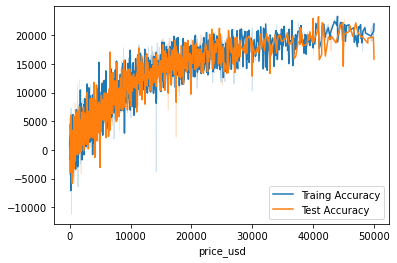

In [57]:
sns.lineplot(y_train, y_pred_lin_train, label='Traing Accuracy')
sns.lineplot(y_test, y_pred_lin, label='Test Accuracy')
plt.show()

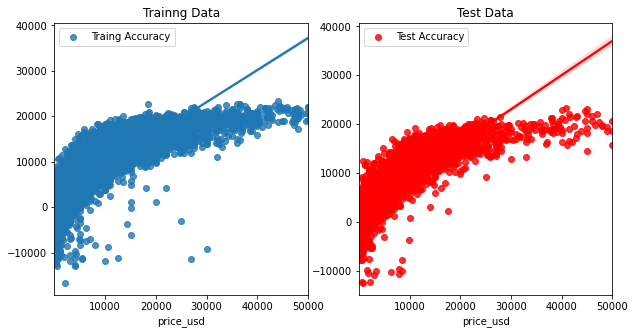

In [58]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(y_train, y_pred_lin_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, y_pred_lin, label='Test Accuracy', color='r')
plt.title("Test Data")
plt.legend()

plt.show()

<h2 align='center'> Decision Tree </h2>

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
dt = DecisionTreeRegressor()

# Fit the model 
dt.fit(x_train , y_train)

#  Make predictions on testset
y_pred_dt = dt.predict(x_test)
y_pred_dt_train = dt.predict(x_train)

# Model Score (r2_score value): 
dt.score(x_test , y_test)

0.8020954606577162

#### Error on Test data 

In [60]:
print("Mean Squared Error(MSE): ", mean_squared_error(y_pred_dt, y_test))
print("Root Mean Squared Error(RMSE): ", np.sqrt(mean_squared_error(y_pred_dt, y_test)))

Mean Squared Error(MSE):  8192824.789562728
Root Mean Squared Error(RMSE):  2862.311092380199


### Visualising Results

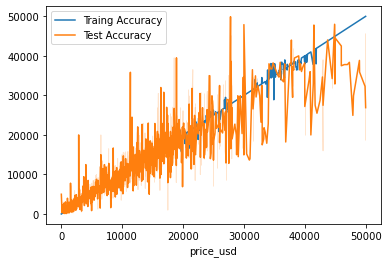

In [61]:
sns.lineplot(y_train, y_pred_dt_train, label='Traing Accuracy')
sns.lineplot(y_test, y_pred_dt, label='Test Accuracy')
plt.show()

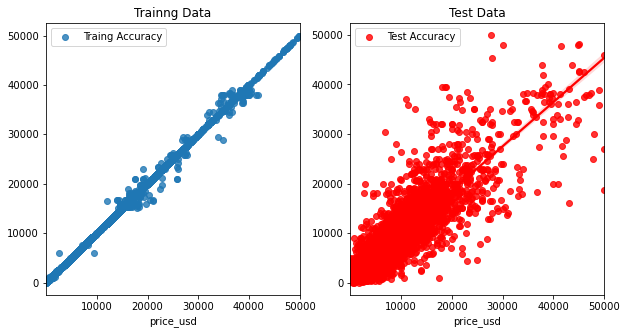

In [62]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(y_train, y_pred_dt_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, y_pred_dt, label='Test Accuracy', color='r')
plt.title("Test Data")
plt.legend()

plt.show()

<h2 align='center'> RandomForest </h2>

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf = RandomForestRegressor()

# Fit the model 
rf.fit(x_train , y_train)

#  Make predictions on testset
y_pred_rf = rf.predict(x_test)
y_pred_rf_train = rf.predict(x_train)

# Model Score (r2_score value): 
rf.score(x_test , y_test)

0.8912854575485144

#### Error on Test data 

In [64]:
print("Mean Squared Error(MSE): ", mean_squared_error(y_pred_rf, y_test))
print("Root Mean Squared Error(RMSE): ", np.sqrt(mean_squared_error(y_pred_rf, y_test)))

Mean Squared Error(MSE):  4500549.615196219
Root Mean Squared Error(RMSE):  2121.449885148414


### Visualising Results

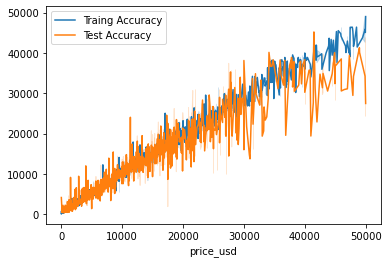

In [65]:
sns.lineplot(y_train, y_pred_rf_train, label='Traing Accuracy')
sns.lineplot(y_test, y_pred_rf, label='Test Accuracy')
plt.show()

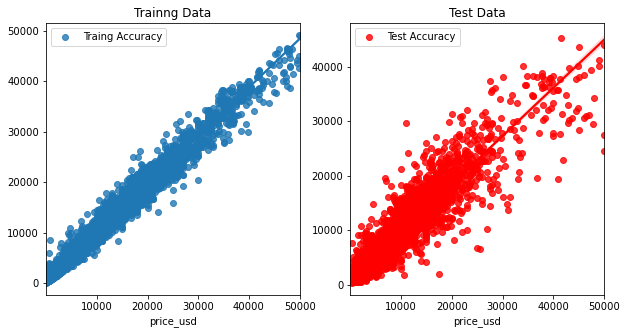

In [66]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(y_train, y_pred_rf_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, y_pred_rf, label='Test Accuracy', color='r')
plt.title("Test Data")
plt.legend()

plt.show()

### Without any Reduction of Attributes

In [67]:
# Original Train Dataset: 
df.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0


In [68]:
df_try = df.copy()

# Filing out missing values by Median: 
df_try['engine_capacity'].fillna(df_try['engine_capacity'].median(), inplace=True)

# Droping out 3 irrelevent column:
df_try.drop(['engine_has_gas', 'has_warranty', 'state', 'duration_listed'], axis=1, inplace=True)

# ONE-HOT-ENCODING: 
df_try = pd.get_dummies(df_try, drop_first=True)
df_try.head(2)

,odometer_value,year_produced,engine_capacity,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,body_type_limousine,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,drivetrain_front,drivetrain_rear
0,245000,2006,1.6,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,1,0
1,265542,2002,3.3,False,True,False,False,False,False,False,...,0,0,1,0,0,0,0,0,1,0


- Now we have 1169 columns 

In [69]:
# Label Encoding: 
list_features = ['feature_0', 'feature_1','feature_2', 'feature_3', 'feature_4', 
                 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']

for i in list_features: 
    df_try[i] = lb.fit_transform(df_try[i])
    
df_try.head(2)

,odometer_value,year_produced,engine_capacity,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,body_type_limousine,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,drivetrain_front,drivetrain_rear
0,245000,2006,1.6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,265542,2002,3.3,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Spliting data into x and y 

In [70]:
X = df_try.drop('price_usd', axis=1)
y = df_try['price_usd']

### Splitting data into train and test split

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)

### 1. Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

# Train the model
lin_reg_try = LinearRegression()

# Fit the model
lin_reg_try.fit(X_train , Y_train)

# Making predictions on Testset
train_lin_y_pred = lin_reg_try.predict(X_train)
lin_y_pred = lin_reg_try.predict(X_test)

# Model Score (r2_score value):
lin_reg_try.score(X_test , Y_test) 

0.8027452988341932

### 2. Decision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
dt_try = DecisionTreeRegressor()

# Fit the model 
dt_try.fit(X_train , Y_train)

#  Make predictions on testset
train_dt_y_pred = dt_try.predict(X_train)
dt_y_pred = dt_try.predict(X_test)

# Model Score (r2_score value): 
dt_try.score(X_test , Y_test)

0.8523499271471465

### 3. RandomForest

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_try = RandomForestRegressor()

# Fit the model 
rf_try.fit(X_train , Y_train)

#  Make predictions on testset
train_rf_y_pred = rf_try.predict(X_train)
rf_y_pred = rf_try.predict(X_test)

# Model Score (r2_score value): 
rf_try.score(X_test , Y_test)

0.9111681584050544

- By reducing features from 1170 to 50: accuracy decreases by 2% but we have reduced time-complexity and dimensionality curse.

<h2 align='center'> Test Data </h2>

In [75]:
df_test = pd.read_csv("https://raw.githubusercontent.com/edis/sds_challenges/master/challenge_2/data/pred_cars.csv")
df_test.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Renault,Megane,mechanical,blue,360000,1997,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,True,False,True,114
1,Peugeot,206,mechanical,silver,267000,1999,gasoline,False,gasoline,1.4,...,False,False,False,False,False,False,False,False,True,67
2,Volkswagen,Sharan,mechanical,blue,172000,2000,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,50
3,Volvo,XC60,mechanical,white,230000,2009,diesel,False,diesel,2.4,...,True,True,True,False,True,True,True,True,True,79
4,Mazda,3,mechanical,silver,206000,2007,gasoline,False,gasoline,1.6,...,True,False,True,False,True,False,False,False,False,74


### Data-preprocessing

In [76]:
# Creating copy of Test set:
data_test = df_test.copy()
data_test.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Renault,Megane,mechanical,blue,360000,1997,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,True,False,True,114
1,Peugeot,206,mechanical,silver,267000,1999,gasoline,False,gasoline,1.4,...,False,False,False,False,False,False,False,False,True,67


### Handling Missing Values

In [77]:
data_test.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      2
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

- engine capacity is the only attribute with 2 missing values

In [78]:
# Filling missing values by median: 
data_test['engine_capacity'].fillna(data_test['engine_capacity'].median(), inplace=True)

# Check if the values are filled or not ?
data_test['engine_capacity'].isna().sum()

0

- Now, TestData has no NaN values

#### consdering top 11 features from manufacturer name

In [79]:
top_11_test = [x for x in data_test.manufacturer_name.value_counts().sort_values(ascending=False).head(11).index ]
top_11_test

['Volkswagen',
 'Opel',
 'BMW',
 'Audi',
 'Renault',
 'Ford',
 'Mercedes-Benz',
 'Peugeot',
 'Citroen',
 'Nissan',
 'Toyota']

#### consdering top 5 features from model name

In [80]:
top_5_test = [x for x in data_test.model_name.value_counts().sort_values(ascending=False).head(5).index ]
top_5_test

['Passat', 'Astra', 'A6', 'Mondeo', 'Golf']

#### consdering top 5 features from body type 

In [81]:
top_5_body_type_test = [x for x in data_test.body_type.value_counts().sort_values(ascending=False).head(5).index ]
top_5_body_type_test

['sedan', 'hatchback', 'universal', 'suv', 'minivan']

#### Calling the function to create dummy for selected categories (function : created in pre-processing step of training data)  

In [82]:
one_hot_label(data_test, 'manufacturer_name', top_11_test)
one_hot_label(data_test, 'model_name', top_5_test)
one_hot_label(data_test, 'body_type', top_5_body_type_test)

####  Dropping attributes whose one-hot-encoding has been performed

In [83]:
data_test.drop(['manufacturer_name', 'model_name', 'body_type'], axis=1, inplace=True)
data_test.head()

,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,has_warranty,state,...,model_name_Passat,model_name_Astra,model_name_A6,model_name_Mondeo,model_name_Golf,body_type_sedan,body_type_hatchback,body_type_universal,body_type_suv,body_type_minivan
0,mechanical,blue,360000,1997,gasoline,False,gasoline,1.6,False,owned,...,0,0,0,0,0,0,0,0,0,0
1,mechanical,silver,267000,1999,gasoline,False,gasoline,1.4,False,owned,...,0,0,0,0,0,0,1,0,0,0
2,mechanical,blue,172000,2000,gasoline,False,gasoline,2.0,False,owned,...,0,0,0,0,0,0,0,0,0,1
3,mechanical,white,230000,2009,diesel,False,diesel,2.4,False,owned,...,0,0,0,0,0,0,0,1,0,0
4,mechanical,silver,206000,2007,gasoline,False,gasoline,1.6,False,owned,...,0,0,0,0,0,1,0,0,0,0


#### Creating new category

In [84]:
colors = ['brown','violet', 'yellow', 'orange']
for i in colors:
    data_test['color'] = np.where(data_test['color']==i, 'other', data_test['color'])

In [85]:
data_test['color'].value_counts() 

black     1543
silver    1372
blue      1131
other      934
white      822
grey       789
red        609
green      507
Name: color, dtype: int64

In [86]:
fuel = ['hybrid-petrol', 'gas', 'electric', 'hybrid-diesel']
for i in fuel:
    data_test['engine_fuel'] = np.where(data_test['engine_fuel']==i, 'others', data_test['engine_fuel'])

In [87]:
data_test['engine_fuel'].value_counts()

gasoline    4806
diesel      2569
others       332
Name: engine_fuel, dtype: int64

### Dropping Irrelevenet columns

In [88]:
data_test.drop(['engine_has_gas', 'has_warranty', 'state', 'duration_listed'], axis=1, inplace=True)
data_test.head(2)

,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,drivetrain,feature_0,feature_1,...,model_name_Passat,model_name_Astra,model_name_A6,model_name_Mondeo,model_name_Golf,body_type_sedan,body_type_hatchback,body_type_universal,body_type_suv,body_type_minivan
0,mechanical,blue,360000,1997,gasoline,gasoline,1.6,front,False,True,...,0,0,0,0,0,0,0,0,0,0
1,mechanical,silver,267000,1999,gasoline,gasoline,1.4,front,False,False,...,0,0,0,0,0,0,1,0,0,0


In [89]:
data_encoded_test = pd.get_dummies(data_test, drop_first=True)
data_encoded_test.head(2)

,odometer_value,year_produced,engine_capacity,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,color_other,color_red,color_silver,color_white,engine_fuel_gasoline,engine_fuel_others,engine_type_electric,engine_type_gasoline,drivetrain_front,drivetrain_rear
0,360000,1997,1.6,False,True,False,False,False,False,False,...,0,0,0,0,1,0,0,1,1,0
1,267000,1999,1.4,False,False,False,False,False,False,False,...,0,0,1,0,1,0,0,1,1,0


In [90]:
list_features = ['feature_0', 'feature_1','feature_2', 'feature_3', 'feature_4', 
                 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']

for i in list_features: 
    data_encoded_test[i] = lb.fit_transform(data_encoded_test[i])

In [91]:
data_encoded_test.head(2)

,odometer_value,year_produced,engine_capacity,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,color_other,color_red,color_silver,color_white,engine_fuel_gasoline,engine_fuel_others,engine_type_electric,engine_type_gasoline,drivetrain_front,drivetrain_rear
0,360000,1997,1.6,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,267000,1999,1.4,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


### Prediction on TestData

In [92]:
rf_test_pred = rf.predict(data_encoded_test)

In [93]:
prediction = pd.DataFrame(rf_test_pred, columns=['price_usd'])
prediction.head()

,price_usd
0,1644.9892
1,1852.5719
2,4001.6706
3,12900.1434
4,4791.4474


In [94]:
prediction.to_csv("RF_Prediction.csv", index=False)